In [62]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from latex_figures import set_plot_formatting
from matplotlib.colors import LinearSegmentedColormap

#### Sines: 4-Pane Separation + Plotting

In [143]:
# Load the figure from the .pkl file
with open(r"C:\Users\benba\OneDrive\Desktop\Oxford\MMSC\Thesis\Thesis Code\Plots\e350_no500_l3_noise0.2_sines_.pdf.pkl", 'rb') as f:  # Replace 'your_figure.pkl' with your actual .pkl file name
    fig = pickle.load(f)
plt.close(fig)  # Close the loaded figure to avoid displaying it
ax1, ax2, ax3, ax4 = fig.axes

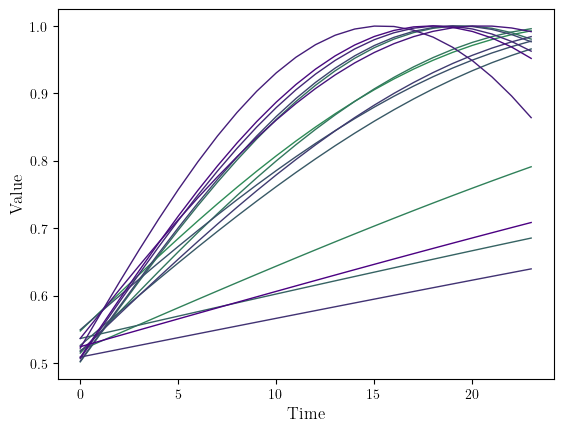

In [144]:
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['seagreen', 'indigo'])
set_plot_formatting()

# Plot 1 - Original Data (Multiple Lines)
num_lines = len(ax1.get_lines())
colors = [cmap(i / (num_lines - 1)) for i in range(num_lines)]
fig1, ax1_new = plt.subplots()
for i, line in enumerate(ax1.get_lines()):
    ax1_new.plot(line.get_xdata(), line.get_ydata(), label=line.get_label(), color=colors[i])#line.get_color())
ax1_new.set_xlabel(ax1.get_xlabel())
ax1_new.set_ylabel(ax1.get_ylabel())

#plt.savefig('testkpkl.pdf',format='pdf')  # Save as a separate plot
plt.show()  # Display the individual plots if needed


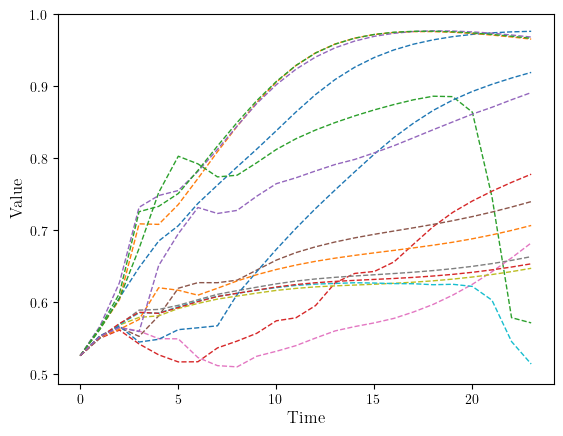

In [145]:
# Plot 2 - Generated Data (Single or Multiple Lines)
fig2, ax2_new = plt.subplots()
for line in ax2.get_lines():
    ax2_new.plot(line.get_xdata(), line.get_ydata(), label=line.get_label(), color=line.get_color(), linestyle=line.get_linestyle())
ax2_new.set_xlabel(ax2.get_xlabel())
ax2_new.set_ylabel(ax2.get_ylabel())

#plt.savefig('/mnt/data/plot2.png')  # Save as a separate plot
plt.show()

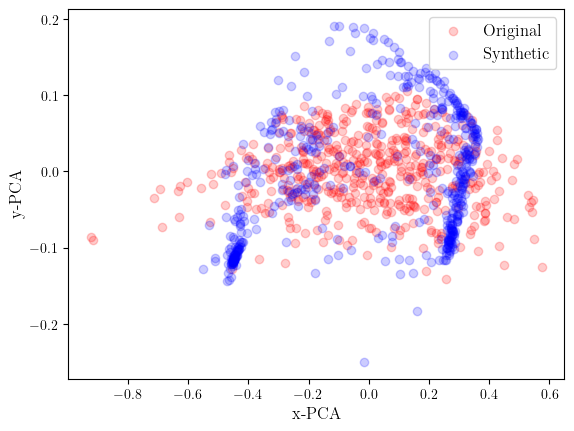

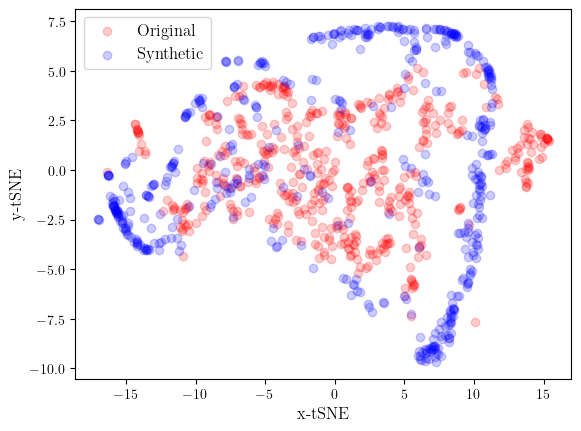

In [146]:
# Plot 3 - PCA plot (Scatter Plot)
fig3, ax3_new = plt.subplots()
for collection in ax3.collections:
    offsets = collection.get_offsets()
    ax3_new.scatter(offsets[:, 0], offsets[:, 1], label=collection.get_label(), alpha=collection.get_alpha(), color=collection.get_facecolor())
#ax3_new.set_title(ax3.get_title())
ax3_new.set_xlabel('x-PCA')
ax3_new.set_ylabel('y-PCA')
ax3_new.legend(loc='best')
#plt.savefig('/mnt/data/plot3.png')  # Save as a separate plot

# Plot 4 - t-SNE plot (Scatter Plot)
fig4, ax4_new = plt.subplots()
colors = ['tab:blue', 'tab:red']
for i, collection in enumerate(ax4.collections):
    offsets = collection.get_offsets()
    ax4_new.scatter(offsets[:, 0], offsets[:, 1], label=collection.get_label(), alpha=collection.get_alpha(), color=collection.get_facecolor())
#ax4_new.set_title(ax4.get_title())
ax4_new.set_xlabel('x-tSNE')
ax4_new.set_ylabel('y-tSNE')
ax4_new.legend(loc='best')

#plt.savefig('/mnt/data/plot4.png')  # Save as a separate plot
plt.show()

#### Stocks: Normalized as %difference

In [ ]:
# Load the figure from the .pkl file
#Insert the path to the .pkl file HERE vvv
with open(r"C:\Users\benba\OneDrive\Desktop\Oxford\MMSC\Thesis\Thesis Code\Plots\e95_noise0.2_stocks.pdf.pkl", 'rb') as f:  # Replace 'your_figure.pkl' with your actual .pkl file name
    fig = pickle.load(f)
plt.close(fig)  # Close the loaded figure to avoid displaying it
ax1, ax2, ax3, ax4 = fig.axes

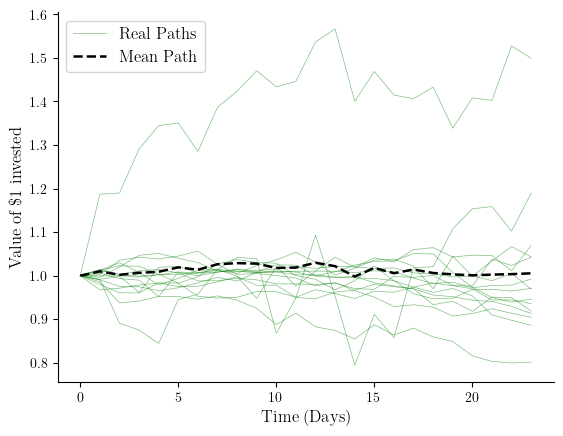

In [142]:
#ORIGINAL STOCK DATA (NORMALISED)
set_plot_formatting()

# Assuming you have your figure and axes loaded as `fig` and `ax1` respectively
fig1, ax1_new = plt.subplots()
all_invested_values = []
added_observed_legend = False
for i, line in enumerate(ax1.get_lines()):
    xdata = line.get_xdata()
    y_data = np.array(line.get_ydata())
    pct_change = np.diff(y_data) / y_data[:-1]
    invested_value = np.concatenate(([1], (1 + pct_change).cumprod()))
    all_invested_values.append(invested_value)
    if not added_observed_legend:
        ax1_new.plot(xdata, invested_value, label='Real Paths', color='green', linewidth=0.5, alpha=0.5)
        added_observed_legend = True
    else:
        ax1_new.plot(xdata, invested_value, color='green', linewidth=0.5, alpha=0.5)
all_invested_values = np.array(all_invested_values)
mean_invested_value = np.mean(all_invested_values, axis=0)
ax1_new.plot(xdata, mean_invested_value, label='Mean Path', color='black', linewidth=1.8, linestyle='--')
ax1_new.set_xlabel('Time (Days)')
ax1_new.set_ylabel('Value of \$1 invested')
ax1_new.spines['top'].set_visible(False)
ax1_new.spines['right'].set_visible(False)
ax1_new.legend()

# Display or save the plot as needed
# plt.savefig('testkpkl.pdf', format='pdf')  # Uncomment to save the plot
plt.show()

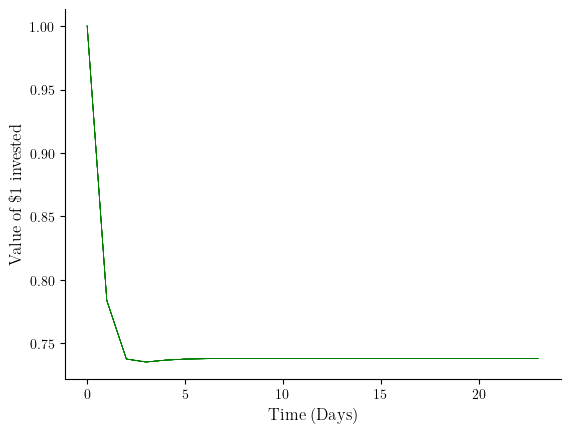

In [109]:
#SYNTHETIC PLOT
fig2, ax2_new = plt.subplots()
for i, line in enumerate(ax2.get_lines()):
    xdata, y_data = line.get_xdata(), line.get_ydata()
    y_data = np.array(y_data)
    pct_change = np.diff(y_data) / y_data[:-1]
    invested_value = np.concatenate(([1], (1 + pct_change).cumprod()))
    ax2_new.plot(line.get_xdata(), invested_value, label=line.get_label(), color='green', linewidth=0.5, alpha=0.5)  # line.get_color())
ax2_new.set_xlabel('Time (Days)')
ax2_new.set_ylabel('Value of \$1 invested')
ax2_new.spines['top'].set_visible(False)
ax2_new.spines['right'].set_visible(False)
plt.show()

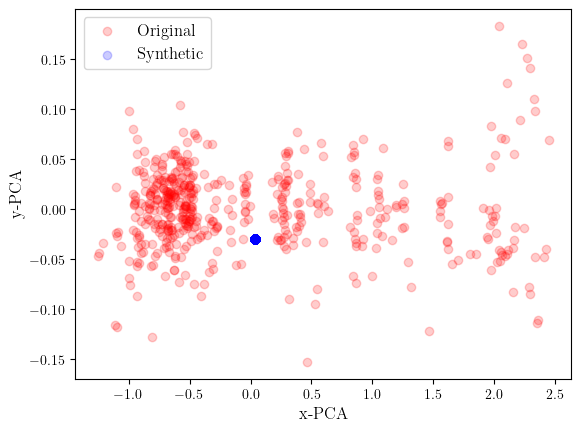

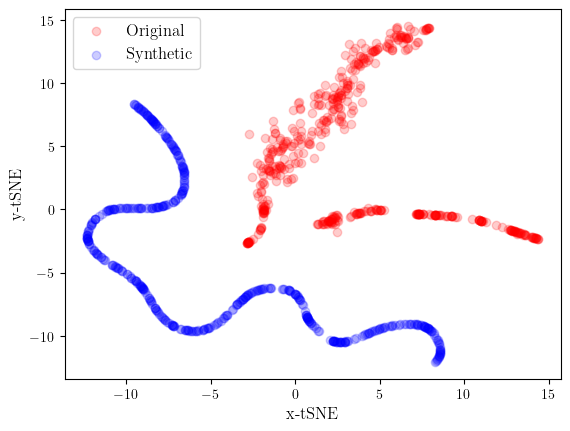

In [90]:
# Plot 3 - PCA plot (Scatter Plot)
fig3, ax3_new = plt.subplots()
for collection in ax3.collections:
    offsets = collection.get_offsets()
    ax3_new.scatter(offsets[:, 0], offsets[:, 1], label=collection.get_label(), alpha=collection.get_alpha(), color=collection.get_facecolor())
#ax3_new.set_title(ax3.get_title())
ax3_new.set_xlabel('x-PCA')
ax3_new.set_ylabel('y-PCA')
ax3_new.legend(loc='best')
#plt.savefig('/mnt/data/plot3.png')  # Save as a separate plot

# Plot 4 - t-SNE plot (Scatter Plot)
fig4, ax4_new = plt.subplots()
colors = ['tab:blue', 'tab:red']
for i, collection in enumerate(ax4.collections):
    offsets = collection.get_offsets()
    ax4_new.scatter(offsets[:, 0], offsets[:, 1], label=collection.get_label(), alpha=collection.get_alpha(), color=collection.get_facecolor())
#ax4_new.set_title(ax4.get_title())
ax4_new.set_xlabel('x-tSNE')
ax4_new.set_ylabel('y-tSNE')
ax4_new.legend(loc='best')

#plt.savefig('/mnt/data/plot4.png')  # Save as a separate plot
plt.show()